### Principa Component Analysis(PCA, 주성분 분석)

1. 주성분 분석은 차원축소를 위해 사용됨

-> 고차원의 데이터를 저차원의 데이터로 feature extraction 가능


- 목적
    - 차원(dimension)을 감소시켜 시각화에 도움
    - 변수의 수를 줄임

- 기대효과 
    - 통계: 적은 수의 특성으로 특정 현상을 설명
    - 머신러닝: 모델 성능 강화


2. 개념

- 여러개의 양적 변수들 사이의 공분산(상관계수)를 이용하여, 
- 변수들의 선형 결합으로 표시되는 주성분을 찾음(축의 개념)
- 2-3개의 주성분으로 전체 분산(variance)의 대부분을 설명하고자 하는 다변량 분석법
- 원 데이터의 소실없이 데이터를 잘 설명할 수 있는 변수들의 선형 조합을 찾는 것 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import datasets 
import matplotlib.pyplot as plt 

## eigenvector / eigencalue 
- 특징
    - n by n 정방행렬은 n개의 eigenvector를 가짐(n개의 eigenvalue)
- 제약 : pca에서 eigenvector의 loading 계수 제곱합은 1

Linear Transform

In [5]:
matrix_a = np.array([[2,3], [2,1]])

In [6]:
vec = np.array([[1],[3]])

In [7]:
np.dot(matrix_a, vec)

array([[11],
       [ 5]])

In [8]:
eigen_a = np.array([[3],[2]])

In [9]:
np.dot(matrix_a, eigen_a)

array([[12],
       [ 8]])

In [10]:
  a = np.array([[3,0,1],[-4,1,2],[-6,0,-2]])

In [11]:
a

array([[ 3,  0,  1],
       [-4,  1,  2],
       [-6,  0, -2]])

In [17]:
np.linalg.eig(a)[0] ## 아이겐백터

array([ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16])

In [18]:
np.linalg.eig(a)[1] ## 아이겐밸류

array([[ 0.00000000e+00,  5.55111512e-17, -9.53462589e-02],
       [ 1.00000000e+00, -1.00000000e+00, -9.53462589e-01],
       [ 0.00000000e+00, -1.11022302e-16,  2.86038777e-01]])

In [22]:
## 아이겐 백터의 길이로 나눠서 제곱합이 1이어야함

np.sum(np.linalg.eig(a)[1][:,2]**2)

1.0

In [ ]:
## 공분산 -> 편차들의 곱# 공분산 -> 편차들의 곱
## 공분산은 분포를 나타냄


- 상관계수행렬은 데이터의 분포를 표현(분포에 관한 정보라고 간주)

- n by n 상관계수 행렬은 n개의 eigenvector를 가짐

- 이 eigenvector들과 상관계수 행렬의 선형 변환으로 데이터가 변하지 않음(데이터 소실이 없음)

- eigenvector를 n개의 축이라고 생각할 때, 데이터를 이 n개의 축에 대해 변환을 실시하면? 

- n번의 변환에서 각각의 상관계수 행렬이 가졌던 오리지널 데이터의 분포에 관한 정보를 전부 나눠가지게 될 것

- 만일 특정 축 몇개가 분포에 관한 정보(분산의) 대부분을 가져간다면? 

- 이 몇개의 축으로(주성분으로, 특성의 수로) 데이터의 대부분을 설명할 수 있을 것 

--> 차원축소(dimension reduction, feature extraction)가 가능해짐 

PCA 데이터를 표준화(standardizing)하여 진행한다!

In [23]:
lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면',
                      '떡라면','짬뽕라면','만두라면','치즈라면',
                      '된장라면','볶음라면','김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})

In [24]:
lamen

{'name': ['쇠고기라면',
  '해물라면',
  '얼큰라면',
  '떡라면',
  '짬뽕라면',
  '만두라면',
  '치즈라면',
  '된장라면',
  '볶음라면',
  '김치라면'],
 'noodle': [2, 1, 5, 2, 3, 4, 4, 1, 3, 5],
 'bowl': [4, 5, 3, 2, 5, 3, 4, 2, 3, 5],
 'soup': [5, 1, 4, 3, 5, 2, 3, 1, 2, 3]}

In [25]:
df_lamen = pd.DataFrame(lamen)

In [51]:
df_lamen

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


## How StandardScaler works?

In [26]:
noodle_sd = np.std(df_lamen['noodle'])
noodle_mean = np.mean(df_lamen['noodle'])

In [28]:
a = []
for i in range(len(df_lamen['noodle'])):
    a.append((df_lamen['noodle'][i] - noodle_mean)/noodle_sd)
a

[-0.7071067811865475,
 -1.414213562373095,
 1.414213562373095,
 -0.7071067811865475,
 0.0,
 0.7071067811865475,
 0.7071067811865475,
 -1.414213562373095,
 0.0,
 1.414213562373095]

## Standardcaler 적용

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. 데이터 분리

In [30]:
lamenEval = df_lamen[['noodle', 'bowl', 'soup']]
lamenName = df_lamen['name']

2. 스케일러로 값 변경

In [67]:
scaler.fit(lamenEval.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
# scaling using standardscaler
scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape

(10, 3)

In [75]:
lamen_scaled

array([[-0.70710678,  0.3592106 ,  1.52752523],
       [-1.41421356,  1.25723711, -1.38204664],
       [ 1.41421356, -0.53881591,  0.80013226],
       [-0.70710678, -1.43684242,  0.0727393 ],
       [ 0.        ,  1.25723711,  1.52752523],
       [ 0.70710678, -0.53881591, -0.65465367],
       [ 0.70710678,  0.3592106 ,  0.0727393 ],
       [-1.41421356, -1.43684242, -1.38204664],
       [ 0.        , -0.53881591, -0.65465367],
       [ 1.41421356,  1.25723711,  0.0727393 ]])

3. PCA 모델링
    - PCA.fit() : 주성분을 찾음
    - PCA.transform() : 새로운 주성분으로 데이터 변환

In [83]:
lamen_scaled

array([[-0.70710678,  0.3592106 ,  1.52752523],
       [-1.41421356,  1.25723711, -1.38204664],
       [ 1.41421356, -0.53881591,  0.80013226],
       [-0.70710678, -1.43684242,  0.0727393 ],
       [ 0.        ,  1.25723711,  1.52752523],
       [ 0.70710678, -0.53881591, -0.65465367],
       [ 0.70710678,  0.3592106 ,  0.0727393 ],
       [-1.41421356, -1.43684242, -1.38204664],
       [ 0.        , -0.53881591, -0.65465367],
       [ 1.41421356,  1.25723711,  0.0727393 ]])

In [89]:
# PCA modelling
pca_lamen = PCA()
pca_lamen.fit(lamen_scaled) # 주성분 (eigenvectors 생성)

# data trasformation
X_pca_lamen = pca_lamen.transform(lamen_scaled) # 주성분에 대한 데이터 변환

# look into data shape
print("original data: {}".format(str(lamen_scaled.shape)))
print("deducted data: {}".format(str(X_pca_lamen.shape)))

original data: (10, 3)
deducted data: (10, 3)


In [90]:
X_pca_lamen

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [88]:
# PCA modeling
pca_lamen = PCA()
pca_lamen.fit(lamen_scaled) #주성분(3개의 eigenvector 생성)

# data transformation
X_pca_lamen = pca_lamen.transform(lamen_scaled) # 주성분에 대한 데이터 변환 (좌표 변환 PCA modeling)
# 주성분에 대한 데이터 변환 (좌표 변환)

# look into data shape 
print('original data: {}'.format(str(lamen_scaled.shape)))
print('deducted data: {}'.format(str(X_pca_lamen.shape)))

original data: (10, 3)
deducted data: (10, 3)


4. 변환된 데이터 확인

In [36]:
X_pca_lamen ## 3개의 변환된 변수(Z1, Z2, Z3)

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [37]:
pca_lamen.components_ ## 3개의 아이겐 백터 
# 1번째 아이겐 백터 # 2번째    #3번째

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

eigenvalue의 이해(feat.cov of transformed data)

In [38]:
df_lamen.corr() # 상관계수 행렬

,noodle,bowl,soup
noodle,1.000000,0.19050,0.360041
bowl,0.190500,1.00000,0.300480
soup,0.360041,0.30048,1.000000


상관 행렬 -> PCA 행렬로 데이터 변환

In [39]:
eig_val, eig_vec = np.linalg.eig(df_lamen.corr())

In [40]:
eig_vec

#1행 1번째 아이겐 백터
#2행 2번째 아이겐 백터
#3행 3번째 아이겐 백터

array([[-0.571511  , -0.60447096, -0.5549685 ],
       [-0.52211611,  0.78960694, -0.32235949],
       [-0.63306393, -0.105526  ,  0.76687308]])

In [41]:
X_pca_lamen

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [42]:
pd.DataFrame(X_pca_lamen).cov(ddof = 0)

TypeError: cov() got an unexpected keyword argument 'ddof'

In [43]:
np.cov(X_pca_lamen.T,ddof=0) ## 설명 된 분산

array([[ 1.57285386e+00, -3.63655046e-17,  7.93454755e-18],
       [-3.63655046e-17,  8.14008318e-01, -4.22580952e-17],
       [ 7.93454755e-18, -4.22580952e-17,  6.13137822e-01]])

In [44]:
eig_val

array([1.57285386, 0.81400832, 0.61313782])

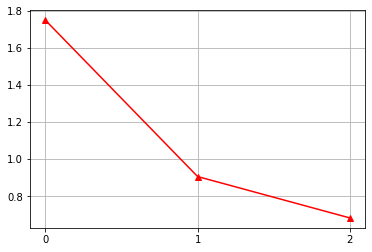

In [46]:
plt.xticks(range(len(pca_lamen.explained_variance_))) ## 변환된 데이터에 대한 분산을 가지고 있음
plt.plot(pca_lamen.explained_variance_,marker='^', c= 'red')
plt.grid()

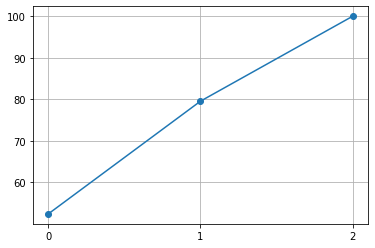

In [49]:
## 전체 분산에서, 주성분 몇개를 골랐을 때 몇퍼센트가 설명되는지

cumVar = np.cumsum(np.round(pca_lamen.explained_variance_ratio_, decimals=4)*100)
plt.xticks(range(len(pca_lamen.explained_variance_)))
plt.plot(cumVar,marker='o')
plt.grid()

## 주성분 z1, z2를 사용시 80%정도를 차지한다. 

In [ ]:
plt.plot(pca_lamen.explained_variance_.marker='^', c='red')

plt.plot(pca_lamen.explained_variance_,marker='^', c= 'red')

## 사이킷런 암 데이터  실습

- PCA가 가장 널리 사용되는 분야 중 하나는 고차원 데이터 셋의 삭화 
- 이 데이터와 같이 특성이 많은 데이터들은 시각화로 데이터의 특성을 살펴보는 것이 불가능 
- iris 데이ㅓ에서 해보았듯이 산점도 행렬로 볼 수 있겠으나, 
- 이 데이터에서는 30개의 특성에 대해 산점도 행렬을 그려도 특성을 보기 어렵다. 
 사이킷런 암 데이터  실습

- PCA가 가장 널리 사용되는 분야 중 하나는 고차원 데이터 셋의 삭화 
- 이 데이터와 같이 특성이 많은 데이터들은 시각화로 데이터의 특성을 살펴보는 것이 불가능 
- iris 데이ㅓ에서 해보았듯이 산점도 행렬로 볼 수 있겠으나, 
- 이 데이터에서는 30개의 특성에 대해 산점도 행렬을 그려도 특성을 보기 어렵다. 
- 2차원에 표현해 볼 수 있는 한가지 방법은 두 클래스(악성, 양성)에 대해 각 특성별로 히스토그램을 그려보는 것

In [50]:
bc = datasets.load_breast_cancer